# Проект: Сборный проект - 2.

## Описание исследования.

## Цель исследования.

Оптимизация управления персоналом бизнеса: на основании предоставленных данных предложить бизнесу, как избежать финансовых потерь и оттока сотрудников.

## Задачи исследования.

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2. построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

## Исходные данные.

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, первый целевой признак.
- qiit - увольнение сотрудника из компании, второй целевой признак.


## Этапы исследования.

***Часть 6. Загрузка библиотек:***
* [6.1. Загрузка библиотек.](#6.1-bullet)

***Часть 7. Изучение общей информации.***
* [7.1. Загрузка и изучение файлов с данными, получение общей информации.](#7.1-bullet)
* [7.2. Нахождение и ликвидация пропусков.](#7.2-bullet)
* [7.3. Итоги изучения общей информации.](#7.3-bullet)

***Часть 8. Предобработка данных:***
* [8.1. Удаление явных дубликатов.](#8.1-bullet)
* [8.2. Приведение данных к нужным типам.](#8.2-bullet)
* [8.3. Анализ уникальных значений в признаках. Удаление неявных дубликатов](#8.3-bullet)
* [8.4. Итоги предобработки данных.](#8.4-bullet)

***Часть 9. Исследовательский анализ данных:***
* [9.1. Нахождение и исправление аномалий и ошибок.](#9.1-bullet)
* [9.2. Построение и анализ распределений, диаграмм рассеяния.](#9.2-bullet)
* [9.3. Анализ матрицы корреляции.](#9.3-bullet)
* [9.4. Итоги исследовательского анализа.](#9.4-bullet)

***Часть 10. ЗАДАЧА 1: ПРЕДСКАЗАНИЕ УРОВНЯ УДОВЛЕТВОРЕННОСТИ СОТРУДНИКА РАБОТОЙ КОМПАНИИ.***
*  [10.1. Обучение моделей. Выбор лучшей.](#10.1-bullet)
*  [10.2. Оценка качества модели на SMAP.](#10.2-bullet)]
*  [10.3. Выводы об обучению моделей.](#10.3-bullet)


***Часть 11. ЗАДАЧА 2: ПРЕДСКАЗАНИЕ УВОЛЬНЕНЯ СОТРУДНИКА ИЗ КОМПАНИИ***
*  [11.1. Дообавление нового входного признака.](#11.1-bullet)
*  [11.2. Обучение модели.](#11.2-bullet)
*  [11.3. Оценка качества модели.](#11.3-bullet)]
*  [11.4. Выводы об обучении модели.](#11.4-bullet)

***Часть 12. Общий вывод:***
*  [12 Общий вывод.](#12-bullet)


## Загрузка библиотек
<a id='6.1-bullet'></a>

In [1]:
#!pip install matplotlib==3.5.0 -q
!pip install phik==0.11.1 -q
!pip install shap==0.40.0 -q
!pip install scipy==1.10.1 -q
#!pip install scikit-learn==1.1.3 -q
!pip install -U scikit-learn -q
!pip install --upgrade scikit-learn lightgbm -q

In [2]:
import re

import math

import shap

import pandas as pd

import phik

import pickle

import sklearn

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import warnings

from phik import resources

from phik.report import plot_correlation_matrix

from scipy import stats as st

from scipy.stats import binom, shapiro, loguniform, ttest_ind
 
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   LabelEncoder,
                                   FunctionTransformer)

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import Ridge

from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import StackingRegressor, RandomForestRegressor

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import (make_scorer,
                             accuracy_score,
                             roc_auc_score,
                             recall_score,
                             f1_score,
                             mean_absolute_error,
                             r2_score,
                             precision_score,
                             confusion_matrix)

from sklearn.model_selection import train_test_split

In [3]:
#константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Изучение общей информации.


### Загрузка данных и изучение файлов с данными, получение общей информации
<a id='7.1-bullet'></a>

In [4]:
train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',')
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
test_features = pd.read_csv('/datasets/test_features.csv', sep=',')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',')
test_target.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [7]:
train_quit = pd.read_csv('/datasets/train_quit.csv', sep=',')
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [8]:
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', sep=',')
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


### Нахождение и ликвидация пропусков
<a id='7.2-bullet'></a>

In [9]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [10]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [11]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [12]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [13]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


### Итоги изучения общей информации
<a id='7.3-bullet'></a>

- Успешно загрузили данные датафреймов.
- Датафрейм train_job, являющийся тренировочной выборкой, хранит данные об уникальном идентификаторе сотрудника, об отделе, в котором работает сотрудник, об уровне занимаемой должности, уровень загруженности сотрудника, длительность работы в компании (в годах), было ли повышение, нарушение трудового договора за последний год, данные об оценке качества работы, ежемесячной зарплате, уровне удовлетворённости сотрудника работой в компании, целевой признак. Типы данных столбцов корректны.
- Датафрейм test_features, являющийся тестовой выборкой, хранит аналогичные данные, кроме уровня удовлетворенности сотрудника работой компании. Типы данных столбцов корректны.
- Датафрейм test_target хранит тестовые данные  об уровне удовлетворенности сотрудика работой компании. Это целевой признак. Типы данных столбцов корректны.
- Датафрейм train_quit, являющийся тренировочной выборкой, хранит данные об уникальном идентификаторе сотрудника, об отделе, в котором работает сотрудник, об уровне занимаемой должности, уровень загруженности сотрудника, длительность работы в компании (в годах), было ли повышение, нарушение трудового договора за последний год, данные об оценке качества работы, ежемесячной зарплате, quit, целевой признак. Типы данных столбцов корректны.
- - Датафрейм test_target_quit хранит тестовые данные  об увольнении сотрудника компании. Это целевой признак. Типы данных столбцов корректны.
- Пропущенных значений в датафреймах не обнаружено. 

##  Предобработка данных

### Удаление явных дубликатов
<a id='8.1-bullet'></a>

In [14]:
# проверим данные датафреймов на дубликаты
train_job.duplicated().sum()

0

In [15]:
test_features.duplicated().sum()

0

In [16]:
test_target.duplicated().sum()

0

In [17]:
train_quit.duplicated().sum()

0

In [18]:
test_target_quit.duplicated().sum()

0

### Анализ уникальных значений в признаках
#### Удаление неявных дубликатов
<a id='8.2-bullet'></a>

Проверим неявные дубликаты столбцов 'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations' У train_job 

In [19]:
def check_duplicats_value_counts(data, list_columns):
    results = {}
    for col in list_columns:
        if col not in data.columns:
            print(f"Column '{col}' not found in dataframe")
            continue
        vc = data[col].value_counts(dropna=False, ascending=False)   # учитываем NaN
        uniq = data[col].unique()
        results[col] = {'value_counts': vc, 'unique': uniq}
    return results

In [20]:
list_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
check_duplicats_value_counts(train_job, list_columns)

{'dept': {'value_counts': sales         1512
  technology     866
  purchasing     610
  marketing      550
  hr             456
  NaN              6
  Name: dept, dtype: int64,
  'unique': array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
        dtype=object)},
 'level': {'value_counts': junior    1894
  middle    1744
  sinior     358
  NaN          4
  Name: level, dtype: int64,
  'unique': array(['junior', 'middle', 'sinior', nan], dtype=object)},
 'workload': {'value_counts': medium    2066
  low       1200
  high       734
  Name: workload, dtype: int64,
  'unique': array(['medium', 'high', 'low'], dtype=object)},
 'last_year_promo': {'value_counts': no     3880
  yes     120
  Name: last_year_promo, dtype: int64,
  'unique': array(['no', 'yes'], dtype=object)},
 'last_year_violations': {'value_counts': no     3441
  yes     559
  Name: last_year_violations, dtype: int64,
  'unique': array(['no', 'yes'], dtype=object)}}

In [21]:
# все строки с хотя бы одним NaN
rows_with_any_nan = train_job[train_job.isna().any(axis=1)]
rows_with_any_nan

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [22]:
list_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
check_duplicats_value_counts(test_features, list_columns)

{'dept': {'value_counts': sales         763
  technology    455
  marketing     279
  purchasing    273
  hr            227
  NaN             2
                  1
  Name: dept, dtype: int64,
  'unique': array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
        dtype=object)},
 'level': {'value_counts': junior    974
  middle    854
  sinior    171
  NaN         1
  Name: level, dtype: int64,
  'unique': array(['junior', 'middle', 'sinior', nan], dtype=object)},
 'workload': {'value_counts': medium    1043
  low        593
  high       363
               1
  Name: workload, dtype: int64,
  'unique': array(['medium', 'low', 'high', ' '], dtype=object)},
 'last_year_promo': {'value_counts': no     1937
  yes      63
  Name: last_year_promo, dtype: int64,
  'unique': array(['no', 'yes'], dtype=object)},
 'last_year_violations': {'value_counts': no     1738
  yes     262
  Name: last_year_violations, dtype: int64,
  'unique': array(['no', 'yes'], dtype=object)}}

In [23]:
# все строки с хотя бы одним NaN
rows_with_any_nan = test_features[test_features.isna().any(axis=1)]
rows_with_any_nan

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


Обнаружили NaN в столбце debt, level в датафреймах train_job и test_features.
Дубликаты не обнаружены

In [24]:
test_nan = test_target['job_satisfaction_rate'].isna().sum()
test_nan

0

In [25]:
list_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
check_duplicats_value_counts(train_quit, list_columns)

{'dept': {'value_counts': sales         1438
  technology     928
  purchasing     588
  marketing      582
  hr             464
  Name: dept, dtype: int64,
  'unique': array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
        dtype=object)},
 'level': {'value_counts': junior    1949
  middle    1694
  sinior     357
  Name: level, dtype: int64,
  'unique': array(['middle', 'junior', 'sinior'], dtype=object)},
 'workload': {'value_counts': medium    2118
  low       1208
  high       674
  Name: workload, dtype: int64,
  'unique': array(['high', 'medium', 'low'], dtype=object)},
 'last_year_promo': {'value_counts': no     3887
  yes     113
  Name: last_year_promo, dtype: int64,
  'unique': array(['no', 'yes'], dtype=object)},
 'last_year_violations': {'value_counts': no     3455
  yes     545
  Name: last_year_violations, dtype: int64,
  'unique': array(['no', 'yes'], dtype=object)},
 'quit': {'value_counts': no     2872
  yes    1128
  Name: quit, dtype: int64,
  'uniqu

In [26]:
list_columns = ['quit']
check_duplicats_value_counts(test_target_quit, list_columns)

{'quit': {'value_counts': no     1436
  yes     564
  Name: quit, dtype: int64,
  'unique': array(['yes', 'no'], dtype=object)}}

In [27]:
list_columns = ['supervisor_evaluation']
check_duplicats_value_counts(train_job, list_columns)

{'supervisor_evaluation': {'value_counts': 4    1603
  3    1263
  5     546
  2     387
  1     201
  Name: supervisor_evaluation, dtype: int64,
  'unique': array([1, 5, 2, 3, 4])}}

In [28]:
list_columns = ['job_satisfaction_rate']
check_duplicats_value_counts(train_job, list_columns)

{'job_satisfaction_rate': {'value_counts': 0.65    94
  0.67    90
  0.68    85
  0.69    84
  0.66    81
          ..
  0.94     4
  0.04     4
  0.98     3
  0.03     3
  1.00     2
  Name: job_satisfaction_rate, Length: 98, dtype: int64,
  'unique': array([0.58, 0.76, 0.11, 0.37, 0.2 , 0.78, 0.56, 0.44, 0.14, 0.47, 0.74,
         0.42, 0.32, 0.57, 0.16, 0.69, 0.33, 0.64, 0.39, 0.8 , 0.79, 0.17,
         0.65, 0.18, 0.19, 0.49, 0.63, 0.22, 0.23, 0.5 , 0.35, 0.3 , 0.77,
         0.88, 0.59, 0.21, 0.36, 0.85, 0.7 , 0.48, 0.6 , 0.1 , 0.27, 0.71,
         0.86, 0.54, 0.73, 0.46, 0.31, 0.72, 0.51, 0.61, 0.81, 0.99, 0.15,
         0.91, 0.68, 0.4 , 0.89, 0.67, 0.75, 0.98, 0.26, 0.45, 0.92, 0.82,
         0.66, 0.55, 0.38, 0.53, 0.84, 0.52, 0.24, 0.62, 0.41, 0.28, 0.09,
         0.97, 0.83, 0.25, 0.43, 0.04, 0.13, 0.29, 0.95, 0.93, 0.87, 0.08,
         0.94, 0.07, 0.34, 0.9 , 0.12, 0.06, 0.96, 0.05, 1.  , 0.03])}}

In [29]:
train_job['job_satisfaction_rate'].sort_values(ascending=False)

1706    1.00
3955    1.00
2757    0.99
81      0.99
2750    0.99
        ... 
2077    0.04
334     0.04
3517    0.03
2717    0.03
2788    0.03
Name: job_satisfaction_rate, Length: 4000, dtype: float64

In [30]:
#исправим ошибку в значении столбца level train_job
train_job['level'] = train_job['level'].replace('sinior', 'senior')
train_job['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [31]:
#исправим ошибку в значении столбца level test_features
test_features['level'] = test_features['level'].replace('sinior', 'senior')
test_features['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [32]:
#исправим ошибку в значении столбца level train_quit
train_quit['level'] = train_quit['level'].replace('sinior', 'senior')
train_quit['level'].unique()

array(['middle', 'junior', 'senior'], dtype=object)

In [33]:
test_target['job_satisfaction_rate'].unique()

array([0.74, 0.75, 0.6 , 0.72, 0.08, 0.76, 0.64, 0.38, 0.14, 0.59, 0.91,
       0.78, 0.7 , 0.79, 0.34, 0.81, 0.23, 0.4 , 0.58, 0.77, 0.68, 0.24,
       0.42, 0.69, 0.47, 0.35, 0.71, 0.83, 0.61, 0.65, 0.37, 0.45, 0.63,
       0.82, 0.16, 0.89, 0.28, 0.32, 0.88, 0.36, 0.33, 0.31, 0.27, 0.73,
       0.53, 0.26, 0.57, 0.2 , 1.  , 0.56, 0.67, 0.19, 0.52, 0.43, 0.12,
       0.11, 0.21, 0.13, 0.49, 0.22, 0.86, 0.46, 0.41, 0.48, 0.29, 0.87,
       0.66, 0.8 , 0.55, 0.5 , 0.51, 0.62, 0.85, 0.84, 0.15, 0.39, 0.25,
       0.9 , 0.07, 0.1 , 0.92, 0.3 , 0.44, 0.18, 0.93, 0.54, 0.96, 0.09,
       0.99, 0.17, 0.95, 0.06, 0.94, 0.03, 0.98, 0.97, 0.04, 0.05])

In [34]:
test_target_quit['quit'].unique()

array(['yes', 'no'], dtype=object)

### Итоги предобработки данных
<a id='9-bullet'></a>

1. Проверили наличие дубликатов в датафреймах.
   Явные дубликаты не обнаружены.
3. Проверили наличие неявных дубликатов в датафреймах, неявные дубликаты не обнаружены.
3. Обнаружены nan в столбцах debt и lebel в таблицах train_job и test_features, значения ' 'в столбцах workload и dept таблицы test_features.

## Исследовательский анализ данных
### Нахождение и исправление аномалий и ошибок
<a id='10-bullet'></a>

In [35]:
train_job.shape

(4000, 10)

In [36]:
train_job_copy = train_job.drop('id', axis=1)
train_job_copy.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [37]:
test_features.shape

(2000, 9)

In [38]:
test_features_copy = test_features.drop('id', axis=1)
test_features_copy.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [39]:
test_target.shape

(2000, 2)

In [40]:
test_target_copy = test_target.drop('id', axis=1)
test_target_copy.describe()

,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


In [41]:
train_quit.shape

(4000, 10)

In [42]:
train_quit_copy = train_quit.drop('id', axis=1)
train_quit_copy.describe()

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [43]:
test_target.shape

(2000, 2)

In [44]:
test_target_copy = test_target.drop('id', axis=1)
test_target_copy.describe()

,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


### Построение и анализ распределений, диаграмм рассеяния.
<a id='9.2-bullet'></a>

При построении графика распределения используется тест Шапиро. Перед проведением теста сформулируем гипотезу:

H0: Данная выборка данных имеет нормальное распределение.

H1: Данная выборка не имеет нормального распределения.

In [45]:
def plot_histogram_with_normality_test(data, column_name, alpha=0.05, bins=10, title='Гистограмма'):
    
    # Если data — DataFrame
    if hasattr(data, 'columns') and column_name in data.columns:
        data_series = data[column_name]
    else:
        data_series = data
    
    # Выполняем тест Шапиро-Уилка
    stat, p = shapiro(data_series)
    p_text = '< 0.001' if p < 0.001 else f'{p:.3f}'
    normality_text = "Распределение выглядит нормальным" if p > alpha else "Распределение не выглядит нормальным"
    
    # Строим гистограмму
    plt.figure(figsize=(8, 5))
    plt.hist(data_series, bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    # Добавляем текст на график
    ax = plt.gca()
    text = f'Statistics = {stat:.3f}\np-value: {p_text}\n{normality_text}'
    ax.text(
        0.5, -0.40,
        text,
        transform=ax.transAxes,
        fontsize=10,
        ha='center',
        color='green' if p > alpha else 'red'
    )
    
    plt.tight_layout()
    plt.show()

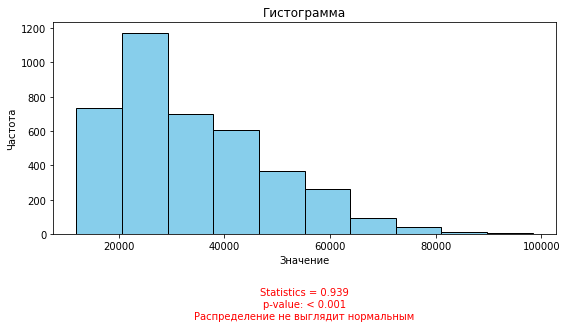

In [46]:
plot_histogram_with_normality_test(train_job, 'salary')

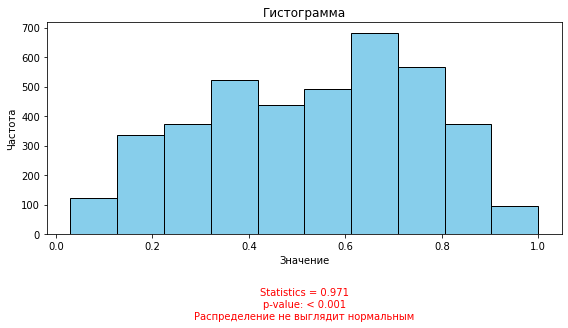

In [47]:
plot_histogram_with_normality_test(train_job, 'job_satisfaction_rate')

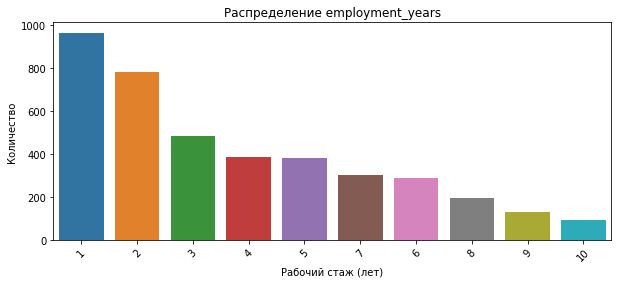

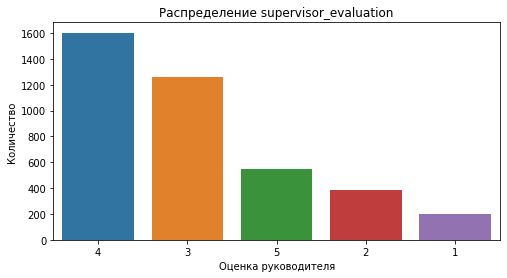

In [48]:
# Анализ признака 'employment_years'
plt.figure(figsize=(10, 4))
sns.countplot(data=train_job, x='employment_years', order=train_job['employment_years'].value_counts().index)
plt.title('Распределение employment_years')
plt.xlabel('Рабочий стаж (лет)')
plt.ylabel('Количество')
plt.xticks(rotation=45)  
plt.show()

# Анализ признака 'supervisor_evaluation'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_job, x='supervisor_evaluation', order=train_job['supervisor_evaluation'].value_counts().index)
plt.title('Распределение supervisor_evaluation')
plt.xlabel('Оценка руководителя')
plt.ylabel('Количество')
plt.show()

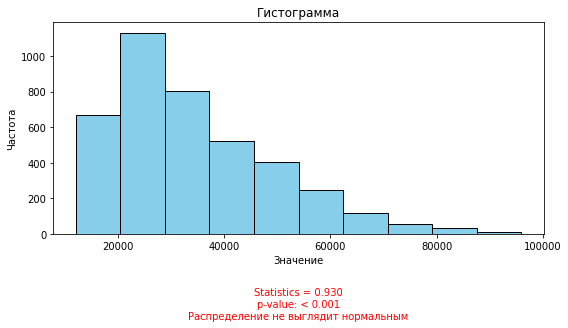

In [49]:
plot_histogram_with_normality_test(train_quit, 'salary')

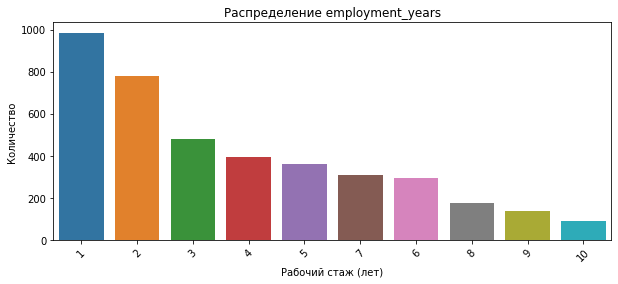

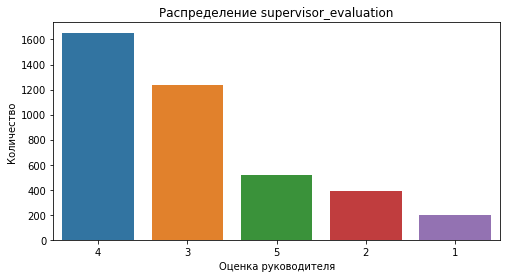

In [50]:
# Анализ признака 'employment_years'
plt.figure(figsize=(10, 4))
sns.countplot(data=train_quit, x='employment_years', order=train_quit['employment_years'].value_counts().index)
plt.title('Распределение employment_years')
plt.xlabel('Рабочий стаж (лет)')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # при необходимости, если значения длинные
plt.show()

# Анализ признака 'supervisor_evaluation'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_quit, x='supervisor_evaluation', order=train_quit['supervisor_evaluation'].value_counts().index)
plt.title('Распределение supervisor_evaluation')
plt.xlabel('Оценка руководителя')
plt.ylabel('Количество')
plt.show()

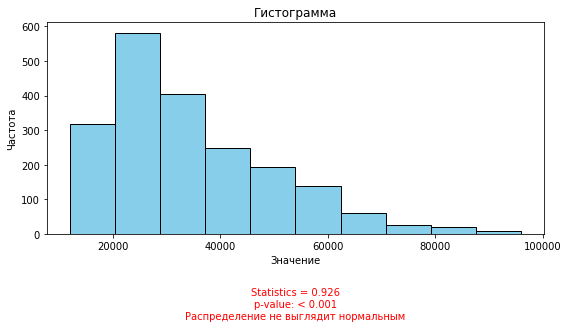

In [51]:
plot_histogram_with_normality_test(test_features, 'salary')

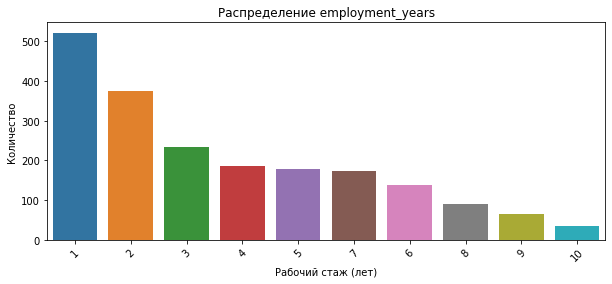

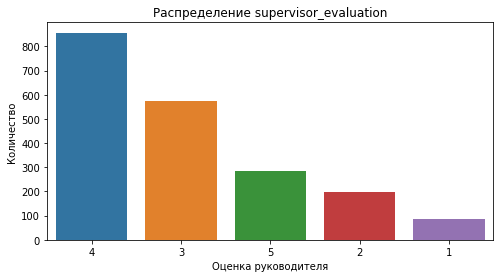

In [52]:
# Анализ признака 'employment_years'
plt.figure(figsize=(10, 4))
sns.countplot(data=test_features, x='employment_years', order=test_features['employment_years'].value_counts().index)
plt.title('Распределение employment_years')
plt.xlabel('Рабочий стаж (лет)')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # при необходимости, если значения длинные
plt.show()

# Анализ признака 'supervisor_evaluation'
plt.figure(figsize=(8, 4))
sns.countplot(data=test_features, x='supervisor_evaluation', order=test_features['supervisor_evaluation'].value_counts().index)
plt.title('Распределение supervisor_evaluation')
plt.xlabel('Оценка руководителя')
plt.ylabel('Количество')
plt.show()

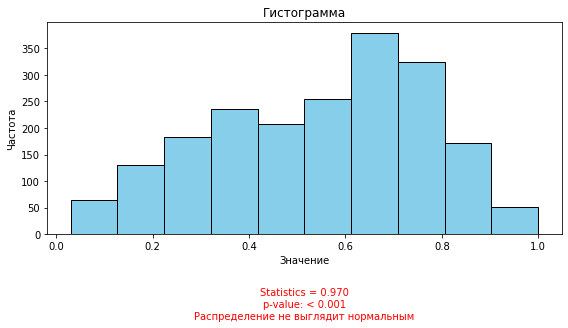

In [53]:
plot_histogram_with_normality_test(test_target, 'job_satisfaction_rate')

In [54]:
def plot_boxplot(df):
    """
    Строит boxplot'ы для числовых столбцов DataFrame, исключая столбец 'id'.
    """
    numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col != 'id']

    if not numeric_columns:
        print("Нет числовых столбцов (кроме 'id') для построения boxplot'ов.")
        return

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns):
        plt.subplot(1, len(numeric_columns), i+1)
        sns.boxplot(data=df[col])
        plt.title(col, rotation=45)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

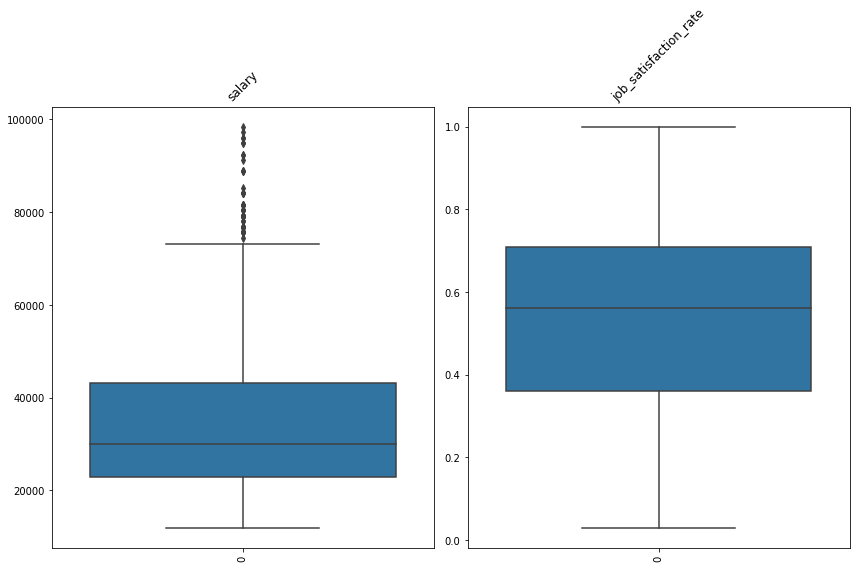

In [55]:
plot_boxplot(train_job[['salary', 'job_satisfaction_rate']])

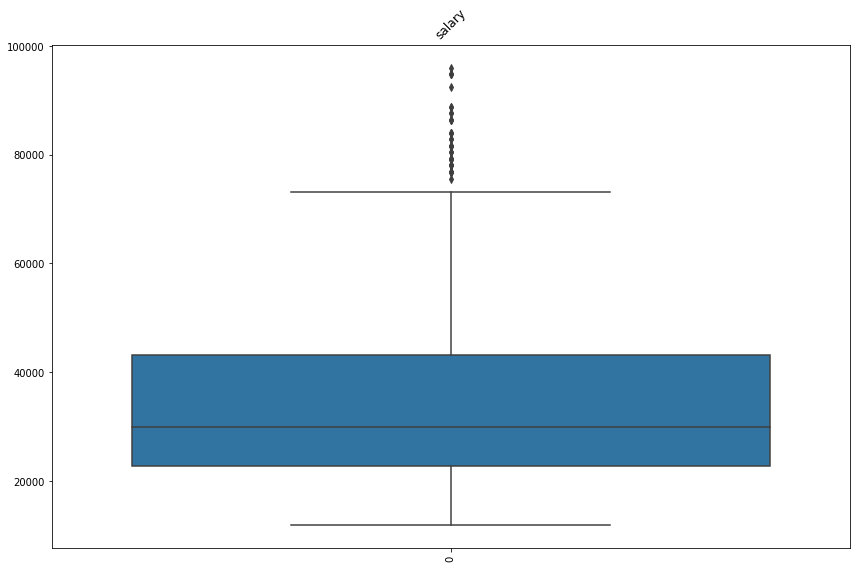

In [56]:
plot_boxplot(test_features[['salary']])

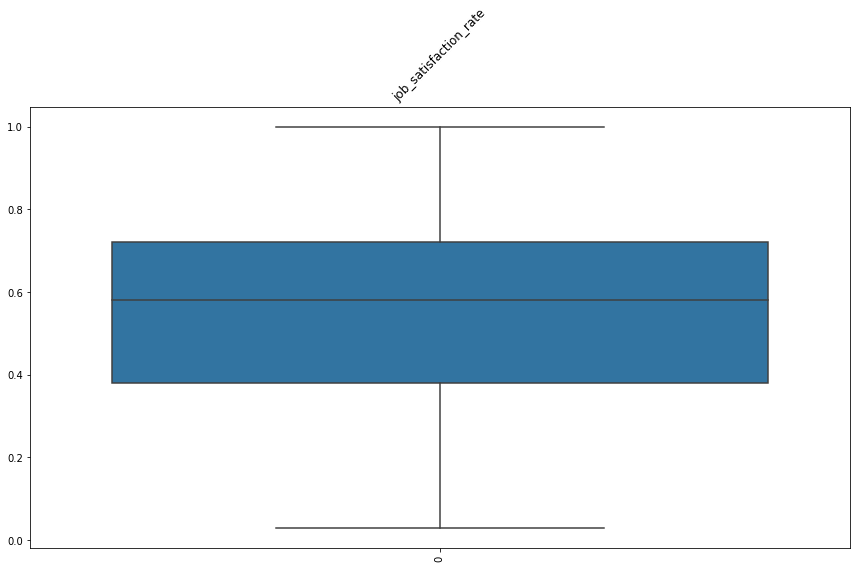

In [57]:
plot_boxplot(test_target)

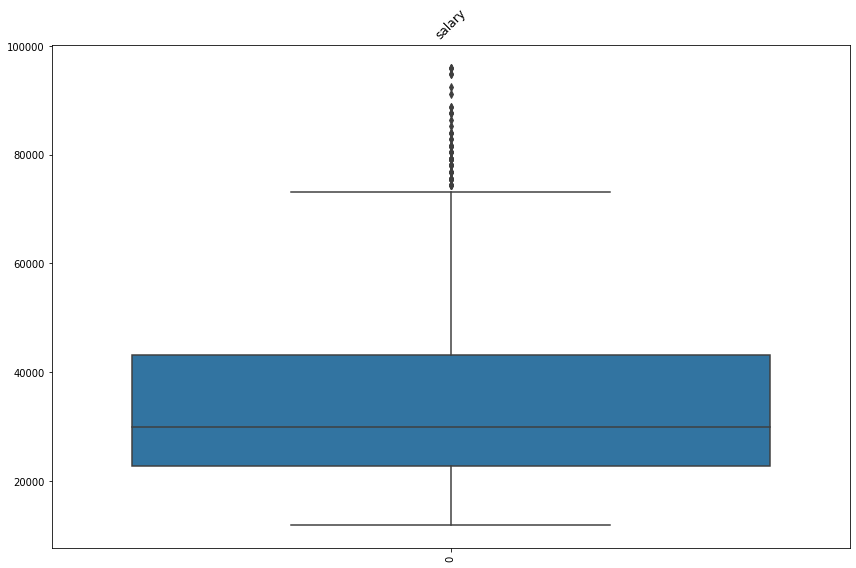

In [58]:
plot_boxplot(train_quit[['salary']])

In [59]:
plot_boxplot(test_target_quit)

Нет числовых столбцов (кроме 'id') для построения boxplot'ов.


In [60]:
def plot_categorical_columns(df):
    
    # Отбор категориальных столбцов
    categorical_df = df.select_dtypes(include='object')
    categorical_columns = categorical_df.columns.tolist()

    # Проверка, есть ли категориальные данные
    if not categorical_columns:
        print("Нет категориальных данных для построения графиков.")
        return

    num_columns = len(categorical_columns)
    num_rows = (num_columns // 3) + (num_columns % 3 > 0)
    num_cols_in_row = min(3, num_columns)
    total_subplots = num_rows * num_cols_in_row  # Общее количество подграфиков

    # Настройка графического оформления
    sns.set(style='whitegrid')

    # Уменьшаем ширину figure для одного столбца, в остальных случая оставляем 15
    figsize_width = 7 if num_columns == 1 else 15

    # Создание графиков
    fig, axes = plt.subplots(num_rows, num_cols_in_row, figsize=(figsize_width, num_rows * 4))

    # Обработка случая, когда axes не является массивом
    if num_columns == 1:
        axes = [axes]
    elif num_rows > 1 or num_cols_in_row > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # Обработка случая, когда num_columns == 1


    for i, column in enumerate(categorical_columns):
        ax = axes[i]

        sns.countplot(x=column, data=df, ax=ax)
        ax.set_title(f'Распределение по {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Количество')
        ax.tick_params(axis='x', rotation=45)

    # Удаление пустых подграфиков
    for j in range(num_columns, total_subplots):
        if j < len(axes):  # Проверяем, что индекс в пределах массива axes
            if isinstance(axes[j], plt.Axes):  # Проверяем, что это объект Axes
                fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()


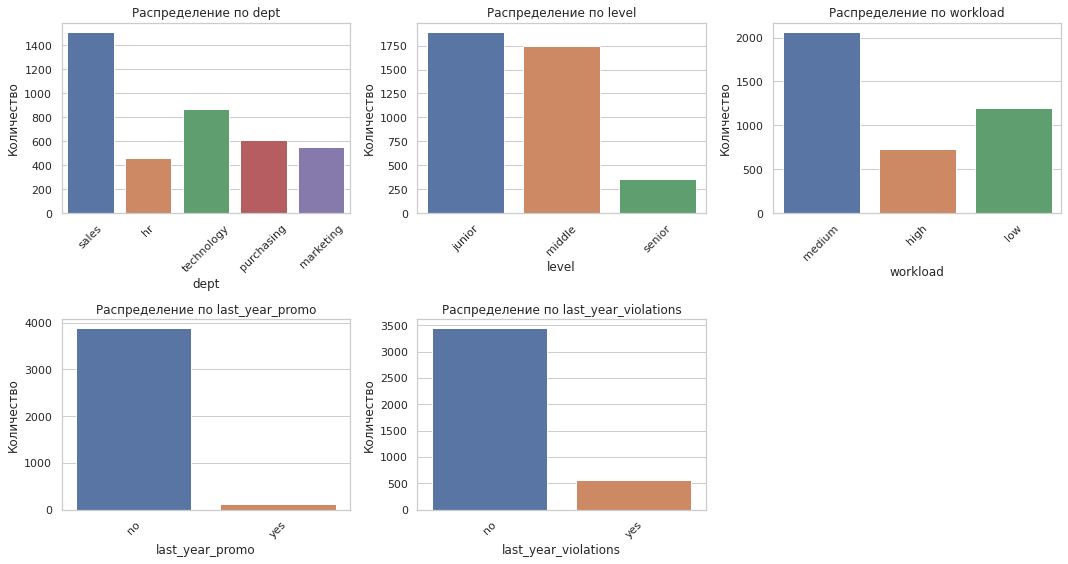

In [61]:
plot_categorical_columns(train_job)

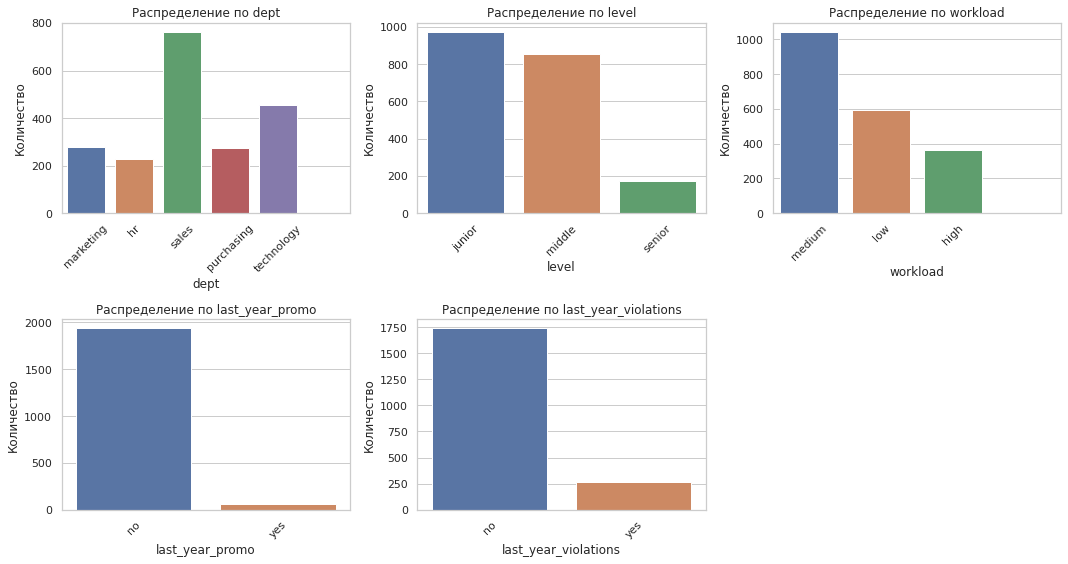

In [62]:
plot_categorical_columns(test_features)

In [63]:
plot_categorical_columns(test_target)

Нет категориальных данных для построения графиков.


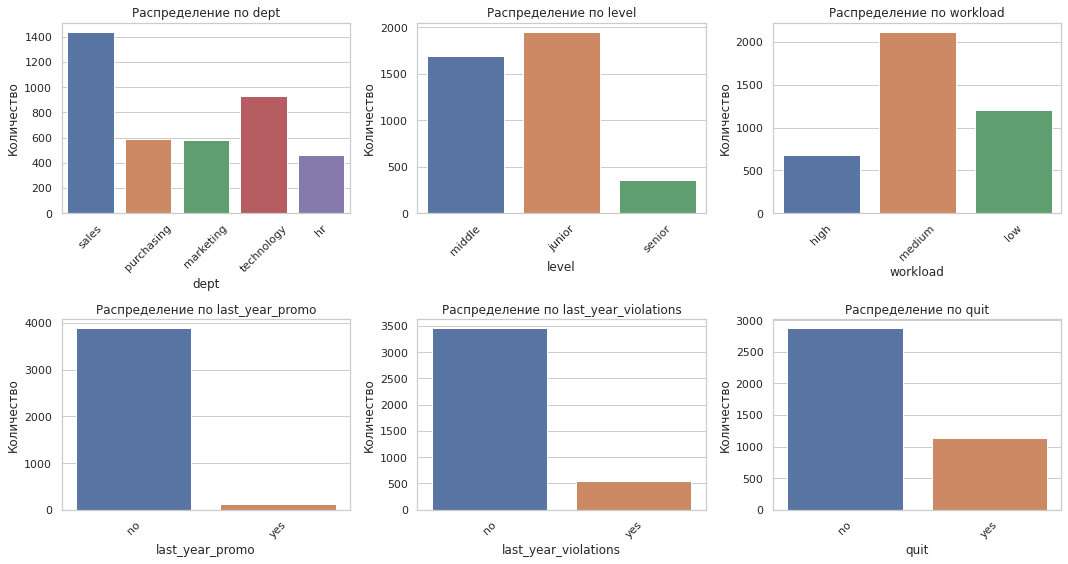

In [64]:
plot_categorical_columns(train_quit)

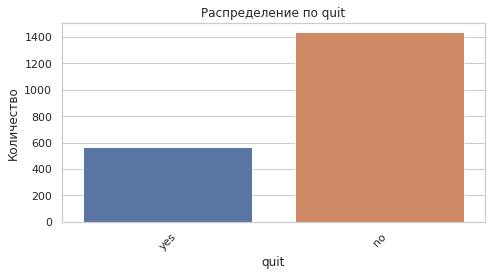

In [65]:
plot_categorical_columns(test_target_quit)

### Анализ матриц корреляции
<a id='9.3-bullet'></a>

In [66]:
# Вычисление матрицы корреляции с использованием phik
phik_matrix = train_job_copy.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
phik_matrix

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.271230,0.082086
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.712607,0.080620
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.778527,0.056128
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.473237,0.325603
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.213295,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.018212,0.560348
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.271230,0.712607,0.778527,0.473237,0.213295,0.018212,0.000000,1.000000,0.143960
job_satisfaction_rate,0.082086,0.080620,0.056128,0.325603,0.190803,0.560348,0.764364,0.143960,1.000000


In [67]:
# Вычисление матрицы корреляции с использованием phik
phik_matrix = train_quit_copy.phik_matrix(interval_cols=['salary'])
phik_matrix

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.269547,0.000000
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.735187,0.312799
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.790246,0.132243
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.477566,0.659093
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.213816,0.157370
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.067084,0.185071
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.050193,0.245489
salary,0.269547,0.735187,0.790246,0.477566,0.213816,0.067084,0.050193,1.000000,0.508234
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.508234,1.000000


In [68]:
# Вычисление матрицы корреляции с использованием phik
phik_matrix = test_features_copy.phik_matrix(interval_cols=['salary'])
phik_matrix

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
dept,1.000000,0.000000,0.032472,0.000000,0.000000,0.000000,0.020219,0.222193
level,0.000000,1.000000,0.196737,0.689666,0.118258,0.017527,0.000000,0.740796
workload,0.032472,0.196737,1.000000,0.167397,0.082891,0.000000,0.008174,0.732336
employment_years,0.000000,0.689666,0.167397,1.000000,0.173637,0.066371,0.000000,0.497227
last_year_promo,0.000000,0.118258,0.082891,0.173637,1.000000,0.000000,0.011704,0.193125
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.059217
supervisor_evaluation,0.020219,0.000000,0.008174,0.000000,0.011704,0.189719,1.000000,0.039832
salary,0.222193,0.740796,0.732336,0.497227,0.193125,0.059217,0.039832,1.000000


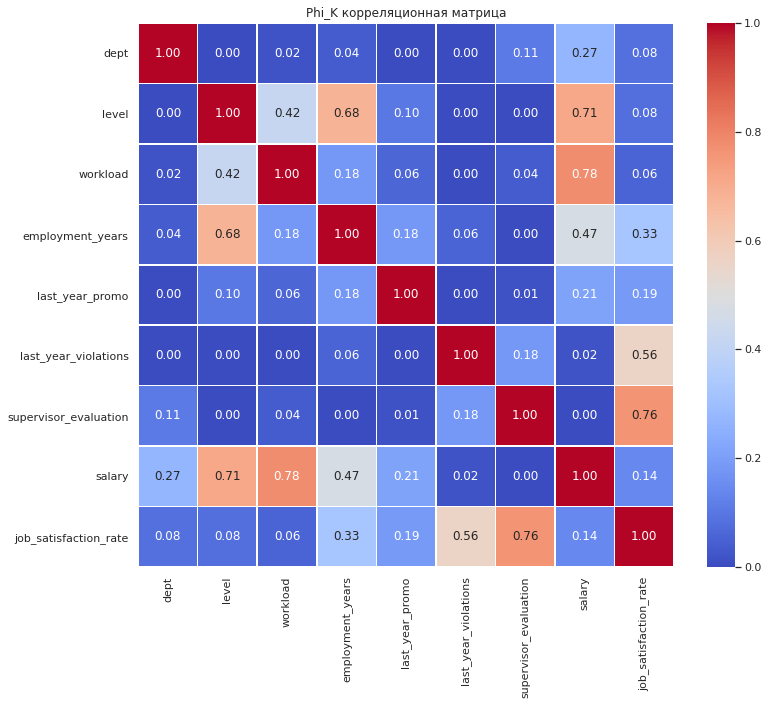

Удалены признаки: set()
Размер train_job_copy после удаления мультиколлинеарности: (4000, 9)


In [69]:
# Рассчитываем матрицу phik
phik_matrix = train_job_copy.phik_matrix(interval_cols = [
    'salary',        
    'job_satisfaction_rate'  
])

# Визуализируем матрицу phi_k
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Phi_K корреляционная матрица")
plt.show()


# Анализ мультиколлинеарности (на основе Phi_K)
threshold = 0.8

cols_to_drop = set()

for i in range(len(phik_matrix.columns)):
    for j in range(i):
        if abs(phik_matrix.iloc[i, j]) > threshold:
            colname_i = phik_matrix.columns[i]
            colname_j = phik_matrix.columns[j]
            cols_to_drop.add(colname_i)

train_job_copy = train_job_copy.drop(columns=cols_to_drop)

print(f"Удалены признаки: {cols_to_drop}")
print("Размер train_job_copy после удаления мультиколлинеарности:", train_job_copy.shape)

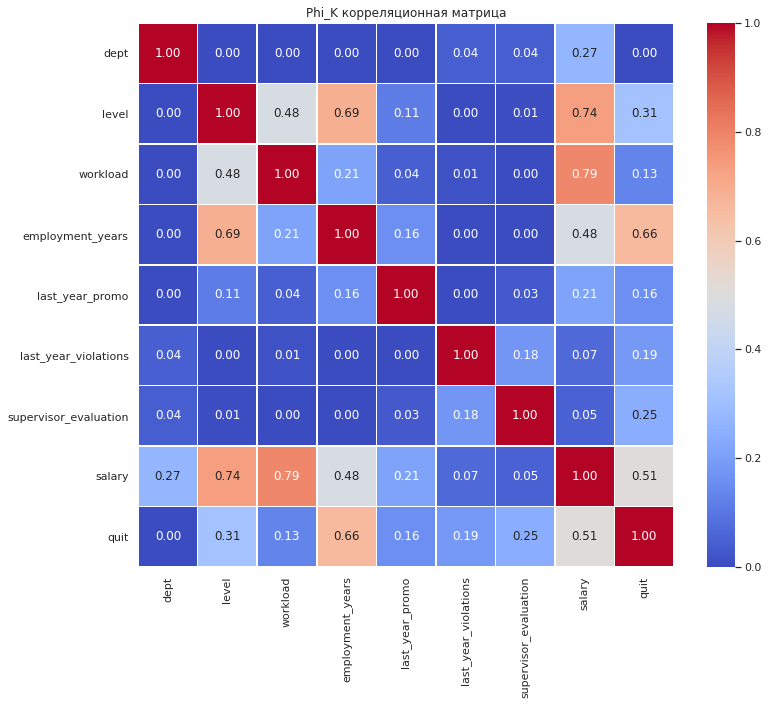

Удалены признаки: set()
Размер train_quit_copy после удаления мультиколлинеарности: (4000, 9)


In [70]:
# Рассчитываем матрицу phik
phik_matrix = train_quit_copy.phik_matrix(interval_cols = [
    'salary'         
])

# Визуализируем матрицу phi_k
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Phi_K корреляционная матрица")
plt.show()


# Анализ мультиколлинеарности (на основе Phi_K)
threshold = 0.8

cols_to_drop = set()

for i in range(len(phik_matrix.columns)):
    for j in range(i):
        if abs(phik_matrix.iloc[i, j]) > threshold:
            colname_i = phik_matrix.columns[i]
            colname_j = phik_matrix.columns[j]
            cols_to_drop.add(colname_i)

train_quit_copy = train_quit_copy.drop(columns=cols_to_drop)

print(f"Удалены признаки: {cols_to_drop}")
print("Размер train_quit_copy после удаления мультиколлинеарности:", train_quit_copy.shape)

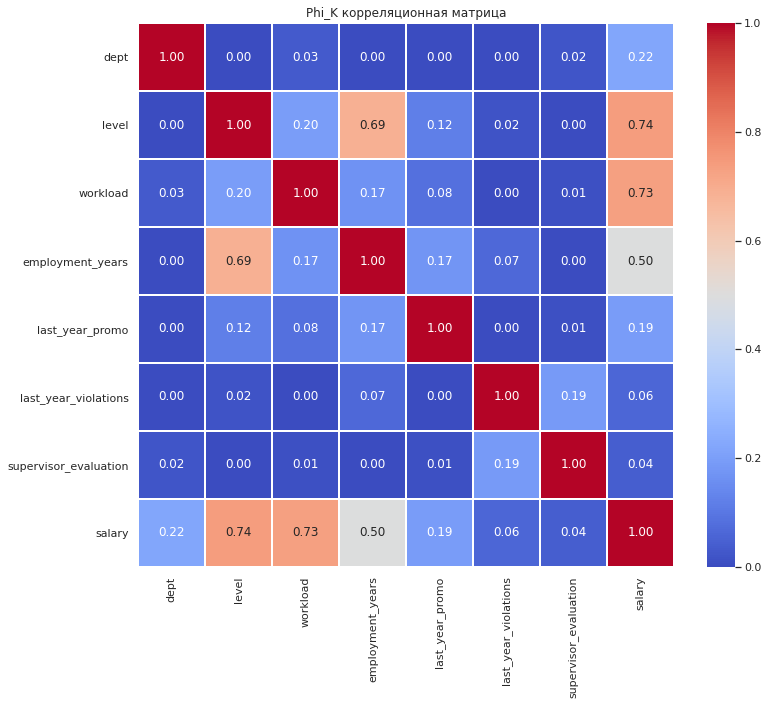

Удалены признаки: set()
Размер test_features_copy после удаления мультиколлинеарности: (2000, 8)


In [71]:
# Рассчитываем матрицу phik
phik_matrix = test_features_copy.phik_matrix(interval_cols = [
    'salary'        
])

# Визуализируем матрицу phi_k
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Phi_K корреляционная матрица")
plt.show()


# Анализ мультиколлинеарности (на основе Phi_K)
threshold = 0.8

cols_to_drop = set()

for i in range(len(phik_matrix.columns)):
    for j in range(i):
        if abs(phik_matrix.iloc[i, j]) > threshold:
            colname_i = phik_matrix.columns[i]
            colname_j = phik_matrix.columns[j]
            cols_to_drop.add(colname_i)

test_features_copy = test_features_copy.drop(columns=cols_to_drop)

print(f"Удалены признаки: {cols_to_drop}")
print("Размер test_features_copy после удаления мультиколлинеарности:", test_features_copy.shape)

### Итоги исследовательского анализа
<a id='9.4-bullet'></a>

- Анализ таблицы train_job:
  - Количественные столбцы имеют несимметричное распределение. Гистограмма столбца salary - смещена влево.
  - Гистограмма job_satisfaction_rate имеeт несимметричное распределение со смещением вправо. 
  - Обнаружены выбросы в столбце salary.
  - Столбeц supervisor_evaluation имеет среднюю оценку 3,47, медианную 4, максимальная оценка 5, минимальная - 1.
  - Столбец employment_years имеет среднее количество лет работы 3.7, медианное - 3 года, максимальное -10 лет, минимальное - 1 год.
  - Наблюдаем сильный дисбаланс в распределении по столбцам last_years_promo, last_years_violations. Что говорит о том, что нарушений трудовой дисциплины и повышений сотрудников за последний год было очень мало.
  - Дисбаланс в распределении по workload - уровню загруженности показывает, что наибольшее количество сотрудников имеют загруженность уровня medium, меньше всего сотрудников имеют уровень загруженности high, примерно половина от уровня medium сотрудников имеют уровень загруженности low. 
  - Дисбаланс в распределении по level - уровню занимаемой должности показывает, что в компании немного сеньоров, и более чем в 4 раза больше middle и junior.
  - В распределении по dept наблюдаем, что больше всего сорудников работают в отделе sales, в два раза меньше в отделе technology, меньше всего в отделе hr.
- Наблюдается сильная корреляция в таблице train_quit между salary и workload - 0.78, esupervisor_evaluation и job_satisfaction_rate - 0.76, level и salary - 0.71, employment_years и level - 0.68.
 
- Анализ таблицы test_features:
  - Количественные столбцы имеют несимметричное распределение. Гистограммы столбцов employment_years и salary - смещены влево.
  - Обнаружены выбросы в столбцах supervisor_evaluation и salary.
  - Столбeц supervisor_evaluation имеeт биномиальное распределение.
  - Наблюдаем сильный дисбаланс в распределении по столбцам last_years_promo, last_years_violations. Что говорит о том, что нарушений трудовой дисциплины и повышений сотрудников за последний год было очень мало.
  - Дисбаланс в распределении по workload - уровню загруженности показывает, что наибольшее количество сотрудников имеют загруженность уровня medium, меньше всего сотрудников имеют уровень загруженности high, уровень загруженности low занимает среднюю позицию. 
   - Дисбаланс в распределении по level - уровню занимаемой должности показывает, что в компании немного сеньоров, и более чем в 4 раза больше middle и junior.
  - В распределении по dept наблюдаем, что больше всего сорудников работают в отделе sales, в два раза меньше в отделе technology, меньше всего в отделе hr.

- Анализ таблицы test_target:
  - Нессиметричное распределение со смещением вправо.

- Анализ таблицы train_quit:
   - Количественные столбцы имеют несимметричное распределение. Гистограмма столбца salary - смещена влево.
  - Обнаружены выбросы в столбце salary.
  - Столбeц supervisor_evaluation имеет среднюю оценку 3,47, медианную 4, максимальная оценка 5, минимальная - 1.
  - Столбец employment_years имеет среднее количество лет работы 3.7, медианное - 3 года, максимальное -10 лет, минимальное - 1 год.
  - Наблюдаем сильный дисбаланс в распределении по столбцам last_years_promo, last_years_violations. Что говорит о том, что нарушений трудовой дисциплины и повышений сотрудников за последний год было очень мало.
  - Дисбаланс в распределении по workload - уровню загруженности показывает, что наибольшее количество сотрудников имеют загруженность уровня medium, меньше всего сотрудников имеют уровень загруженности high, уровень загруженности low занимает среднюю позицию. 
   - Дисбаланс в распределении по level - уровню занимаемой должности показывает, что в компании немного сеньоров, и более чем в 4 раза больше middle и junior.
  - В распределении по dept наблюдаем, что больше всего сорудников работают в отделе sales, в два раза меньше в отделе technology, меньше всего в отделе hr.
  - В распределении по quit видим, что уволившихся в три раза меньше, чем оставшихся.
- Наблюдается сильная корреляция в таблице train_quit между salary и workload - 0.79, employment_years и quit - 0.66, level и salary - 0.74, employment_years и level - 0.69.

- Анализ таблицы test_target_quit:
  - В распределении по quit видим, что уволившихся в три раза меньше, чем оставшихся.

- Очень высоких корреляций (0.9 +) по матрицам корреляций не видно, скорее всего мультиколлинеарности нет.

## Задача 1: Предсказание уровня удовлетворенности сотрудника работой компании.
<a id='10-bullet'></a>

In [72]:
train_job_pipe = train_job.copy()
test_features_pipe = test_features.copy()
test_target_pipe = test_target.copy()

In [73]:
train_job_pipe_drop_id = train_job_pipe.drop('id', axis=1)
train_job_pipe_drop_id.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,2,no,no,1,24000,0.58
1,hr,junior,high,2,no,no,5,38400,0.76
2,sales,junior,low,1,no,no,2,12000,0.11
3,technology,junior,low,4,no,no,2,18000,0.37
4,hr,junior,medium,1,no,no,3,22800,0.20


In [74]:
train_job_pipe_drop_id.duplicated().sum()

245

In [75]:
# удалим дубликаты
train_job_pipe_drop_id = train_job_pipe_drop_id.drop_duplicates()
train_job_pipe_drop_id.duplicated().sum()

0

### Обучение моделей. Выбор лучшей.
<a id='10.1-bullet'></a>

In [76]:
##попробуем DecisionTreeRegressor и Ridge
X_train = train_job_pipe_drop_id.drop(columns=['job_satisfaction_rate'])
y_train = train_job_pipe_drop_id['job_satisfaction_rate']

In [77]:
X_train.duplicated().sum()

1247

In [78]:
merged_target = test_features_pipe.merge(test_target_pipe[['id','job_satisfaction_rate']],
                              on='id', how='left')

X_test = merged_target.drop('id', axis=1)

In [79]:
y_test = merged_target['job_satisfaction_rate']

In [80]:
X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years',
               'salary',
               'supervisor_evaluation'
              ]

replace_space = FunctionTransformer(lambda X: X.replace(' ', 'unknown'))

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('replace_space', replace_space),
     ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

In [81]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('replace_space', replace_space),
     ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=-1
            )
        ),
     ]
)                              
def smape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.abs(y_true) + np.abs(y_pred)
    denom = np.where(denom == 0.0, eps, denom)
    return 100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / denom)
smape_scorer = make_scorer(smape, greater_is_better=False)

In [82]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', Ridge(random_state=RANDOM_STATE))
])

param_grid = [
    
    # словарь для модели Ridge()
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': loguniform(1e-4, 1e3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели DecisionTreeRegressor()
    {
         'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
         'models__max_depth': [None] + list(range(2, 15)),
         'models__max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
         'models__min_samples_split': list(range(2, 11)),
         'models__min_samples_leaf': list(range(1, 6)),
         'models__min_impurity_decrease': [0.0, 0.001, 0.01, 0.05],
         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }  
]


randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=40,
    error_score='raise', 
    verbose=1
)
randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)


cv_best = randomized_search.best_score_
cv_smape_pos = -cv_best if (cv_best is not None and cv_best < 0) else cv_best
print('Метрика лучшей модели на кросс_валидации: ', cv_smape_pos)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('replace_space',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f28b69e9e50>)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'las

### Оценка качества модели на тестовых данных.
<a id='10.2-bullet'></a>

In [83]:
y_pipe = randomized_search.predict(X_test)   # predictions в порядке df_test
print("SMAPE:", smape(y_test, y_pipe))
print(y_pipe)

SMAPE: 13.473621657367799
[0.885      0.68222222 0.69777778 ... 0.195      0.51857143 0.57444444]


Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


In [84]:
# Создаем и обучаем DummyRegressor на тех же данных, что и модель
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

DummyRegressor()

In [85]:
# Предсказания модели     
y_pred_model = randomized_search.predict(X_test)

# Предсказания DummyRegressor
y_pred_dummy = dummy_model.predict(X_test)

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


In [86]:
# Метрики для лучшей модели
mae_model = mean_absolute_error(y_test, y_pred_model)
r2_model = r2_score(y_test, y_pred_model)

# Для DummyRegressor
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

print(f"Результат лучшей модели: MAE={mae_model:.3f}, R^2={r2_model:.3f}")
print(f"Константная модель Dummy: MAE={mae_dummy:.3f}, R^2={r2_dummy:.3f}")

Результат лучшей модели: MAE=0.057, R^2=0.884
Константная модель Dummy: MAE=0.189, R^2=-0.005


MAE у лучшей модели значительно ниже (0.057 против 0.189), что означает более точные предсказания.
R² (коэффициент детерминации) равен 0.884 и говорит о том, что модель очень хорошо объясняет вариации целевой переменной.
У DummyRegressor R² около -0.005, что практически равно нулю, то есть, простое предсказание среднего значения без учета признаков работает значительно хуже.

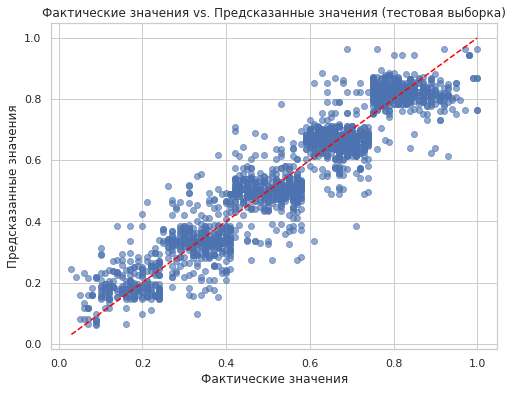

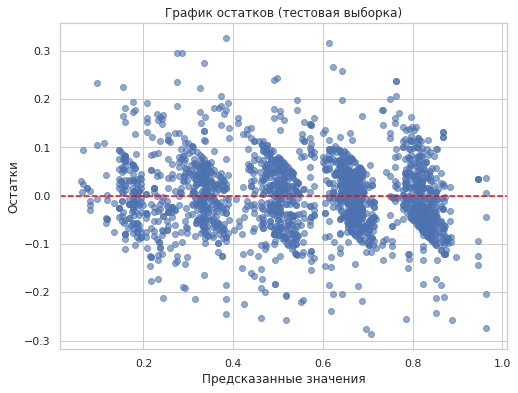

In [87]:
# Scatter фактические vs предсказанные
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pipe, alpha=0.6)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические значения vs. Предсказанные значения (тестовая выборка)')
lims = [min(y_test.min(), y_pipe.min()), max(y_test.max(), y_pipe.max())]
plt.plot(lims, lims, color='red', linestyle='--')  # диагональ y = x
plt.show()

# Остатки
residuals = y_test - y_pipe

plt.figure(figsize=(8,6))
plt.scatter(y_pipe, residuals, alpha=0.6)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков (тестовая выборка)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()



### Выводы по обучению моделей.
<a id='10.3-bullet'></a>

В этом случае, DecisionTreeRegressor показал лучшие результаты SMAPE на кросс-валидации, чем Ridge с выбранными для них гиперпараметрами в процессе случайного поиска. Почему это произошло:
- Нелинейность и взаимодействия: Ridge — линейная модель, она плохо моделирует сложные нелинейные зависимости и взаимодействия фич. 
- Деревья умеют моделировать нелинейные зависимости и взаимодействия признаков без явной их генерации;
- Деревья хорошо работают с категориальными признаками и с нечитабельными значениями;
- Не требуют масштабирования признаков (в то время как Ridge чувствителен к масштабу и к корреляции признаков);
- При богатом поиске гиперпараметров (для дерева выбрано много параметров) вероятность найти «хорошую» конфигурацию выше.

## Задача 2: предсказание увольнения сотрудника из компании.
<a id='11-bullet'></a>

### Составление портрета уволившегося сотрудника.
<a id='11.1-bullet'></a>

In [88]:
df = train_quit.copy()

In [89]:
def relative_quit_share(df, col):
    # Общее число уволенных
    total_quit = len(df[df['quit'] == 'yes'])
    
    # Группировка уволенных по выбранному признаку
    quit_counts = df[df['quit'] == 'yes'].groupby(col).size()
    
    # Расчет доли каждого сегмента относительно общего числа уволенных
    quit_percentage = (quit_counts / total_quit) * 100
    
    # Создаем DataFrame 
    res = pd.DataFrame({
        col: quit_counts.index,
        'quit_count': quit_counts.values,
        'quit_share_pct': quit_percentage.values
    })
    
    # Сортируем по убыванию 
    res = res.sort_values('quit_share_pct', ascending=False).reset_index(drop=True)
    
    return res

# Показать результаты
print("Доля уволенных по dept:\n", relative_quit_share(df, 'dept'))
print("\nДоля уволенных по level:\n", relative_quit_share(df, 'level'))
print("\nДоля уволенных по workload:\n", relative_quit_share(df, 'workload'))
print("\nДоля уволенных по employment_years:\n", relative_quit_share(df, 'employment_years'))
print("\nДоля уволенных по last_year_promo:\n", relative_quit_share(df, 'last_year_promo'))
print("\nДоля уволенных по last_year_violations:\n", relative_quit_share(df, 'last_year_violations'))
print("\nДоля уволенных по supervisor_evaluation:\n", relative_quit_share(df, 'supervisor_evaluation'))

Доля уволенных по dept:
          dept  quit_count  quit_share_pct
0       sales         407       36.081560
1  technology         276       24.468085
2  purchasing         166       14.716312
3   marketing         163       14.450355
4          hr         116       10.283688

Доля уволенных по level:
     level  quit_count  quit_share_pct
0  junior        1003       88.918440
1  middle         108        9.574468
2  senior          17        1.507092

Доля уволенных по workload:
   workload  quit_count  quit_share_pct
0      low         519       46.010638
1   medium         488       43.262411
2     high         121       10.726950

Доля уволенных по employment_years:
    employment_years  quit_count  quit_share_pct
0                 1         599       53.102837
1                 2         290       25.709220
2                 3         163       14.450355
3                 4          27        2.393617
4                 5          23        2.039007
5                 6          10 

По отделам (dept):
Самый большой процент уволенных — в отделе sales (36.08%), за ним идут technology (24.47%) и purchasing (14.72%).
Наименьшая доля уволенных — в отделе hr (10.28%).
Отделы с большим числом сотрудников или более высокой текучестью могут требовать дополнительного анализа.
По уровню (level):
Почти все уволенные — это junior сотрудники (88.92%), что указывает на высокий уровень текучести среди младших специалистов.
В более старших категориях — значительный дисбаланс, всего около 9.57% — middle, и лишь 1.51% — senior.
По рабочей нагрузке (workload):
Уволены примерно равномерно между low (46.01%) и medium (43.26%) нагрузками.
Меньше — high (10.73%).
По стажу работы (employment_years):
Прослеживается, что более длинный стаж (более 1 года) связан с меньшей долей увольнений.
Самая высокая доля — у сотрудников с 1 годом работы (53.10%), затем у тех кто с 2 годами (25.71%).
По повышению за последний год (last_year_promo):
Почти все — не получали повышение в прошлом году (99.91%), меньшая часть — получили (0.09%).
По наличию нарушений (last_year_violations):
Большинство сотрудников — без нарушений (79.79%), с 20.21% нарушителей.
Нарушения, возможно, являются фактором увольнения.
По оценке руководителя (supervisor_evaluation):
Большинство уволенных — с низкими оценками (3 и 4).
Меньше — с оценкой 1 и 2.
Высокая оценка (5) связана с меньшей долей уволенных (5.32%).

In [90]:
# сравниваем среднее значение зарплаты ушедших сотрудников с теми, кто остался
pivot_overall = pd.pivot_table(
    df,
    index='quit',
    values='salary',
    aggfunc=['mean','count','std']
)
pivot_overall.columns = ['salary_mean','n','salary_std']
pivot_overall = pivot_overall.sort_values('salary_mean', ascending=False)
print("Mean salary by quit status:\n", pivot_overall)

Mean salary by quit status:
        salary_mean     n    salary_std
quit                                  
no    37702.228412  2872  15218.977339
yes   23885.106383  1128   9351.599505


Среднее значение зарплаты уволившихся в 1.57 раз меньше зарплаты работающих. Возможно, это одна из причин увольнений.

In [91]:
test_df = test_features.copy()

target_df = test_target.copy()
target_quit_df = test_target_quit.copy()

merged_target = test_df.merge(target_df[['id','job_satisfaction_rate']],
                              on='id', how='left')

merged_target_quit = merged_target.merge(target_quit_df[['id','quit']],
                              on='id', how='left')

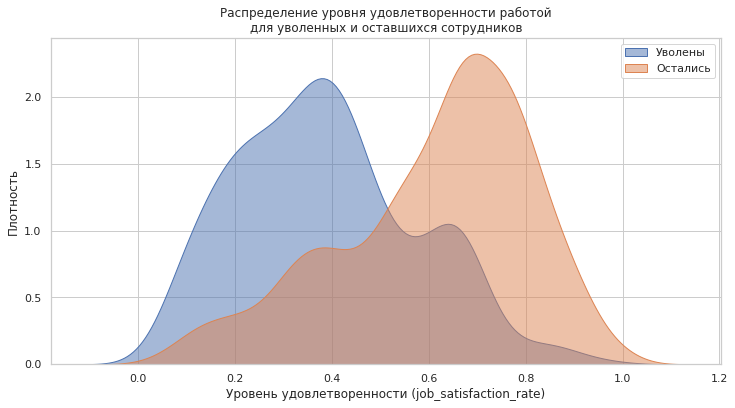

In [92]:
# Создаем два поднабора данных: уволены и не уволены
quit_yes = merged_target_quit[merged_target_quit['quit'] == 'yes']
quit_no = merged_target_quit[merged_target_quit['quit'] == 'no']

# Визуализация распределения
plt.figure(figsize=(12, 6))
sns.kdeplot(quit_yes['job_satisfaction_rate'], label='Уволены', fill=True, alpha=0.5)
sns.kdeplot(quit_no['job_satisfaction_rate'], label='Остались', fill=True, alpha=0.5)

plt.title('Распределение уровня удовлетворенности работой\nдля уволенных и оставшихся сотрудников')
plt.xlabel('Уровень удовлетворенности (job_satisfaction_rate)')
plt.ylabel('Плотность')
plt.legend()
plt.show()


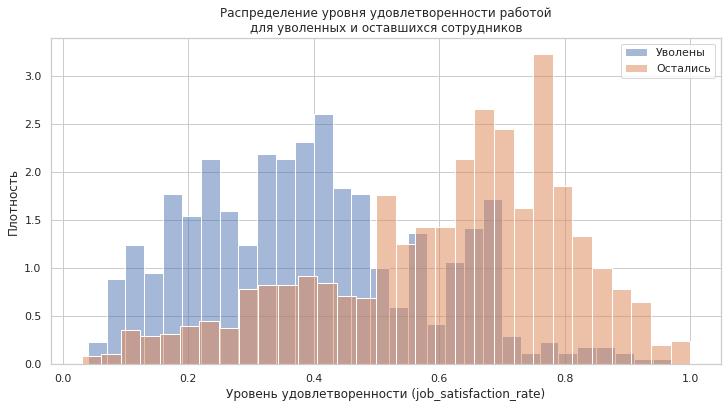

In [93]:
sns.set(style='whitegrid')

dff = merged_target_quit.copy()

q_yes = dff[dff['quit']=='yes']['job_satisfaction_rate'].dropna()
q_no  = dff[dff['quit']=='no']['job_satisfaction_rate'].dropna()

plt.figure(figsize=(12,6))

sns.histplot(q_yes, bins=31, stat='density', color='C0', alpha=0.5, label='Уволены')

sns.histplot(q_no, bins=31, stat='density', color='C1', alpha=0.5, label='Остались')

plt.title('Распределение уровня удовлетворенности работой\nдля уволенных и оставшихся сотрудников')
plt.xlabel('Уровень удовлетворенности (job_satisfaction_rate)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Уровень удовлетворенности работой у оставшихся выше, чем у уволившихся, что закономерно.

проведем статистический тест

Нулевая гипотеза (H0): Средние значения job_satisfaction_rate у уволенных и не уволенных сотрудников равны.

Альтернативная гипотеза (H1): Средние значения job_satisfaction_rate у уволенных и не уволенных сотрудников различны.

In [94]:
# Создаем выборки
job_sat_quit_yes = quit_yes['job_satisfaction_rate'].dropna()
job_sat_quit_no = quit_no['job_satisfaction_rate'].dropna()

# Статистический тест
t_stat, p_value = ttest_ind(job_sat_quit_yes, job_sat_quit_no, equal_var=False)

# Вывод результатов
print(f"Т-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Разница в уровнях удовлетворенности работой между уволенными и оставшимися сотрудниками статистически значима.")
else:
    print("Нет статистически значимых различий в уровнях удовлетворенности работой между группами.")

Т-статистика: -23.7951
P-значение: 0.0000
Разница в уровнях удовлетворенности работой между уволенными и оставшимися сотрудниками статистически значима.


### Добавление нового входного признака.
<a id='11.2-bullet'></a>

In [95]:
train_quit_copy = train_quit.copy()

X_train = train_quit_copy.drop(columns=['id', 'quit'])

y_pipe_quit = randomized_search.predict(X_train)   # predictions 

print(y_pipe_quit)

[0.605      0.84636364 0.3375     ... 0.54428571 0.55333333 0.53      ]


In [96]:
train_quit_copy['job_satisfaction_rate_pred'] = y_pipe_quit
train_quit_copy.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.605000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.791667


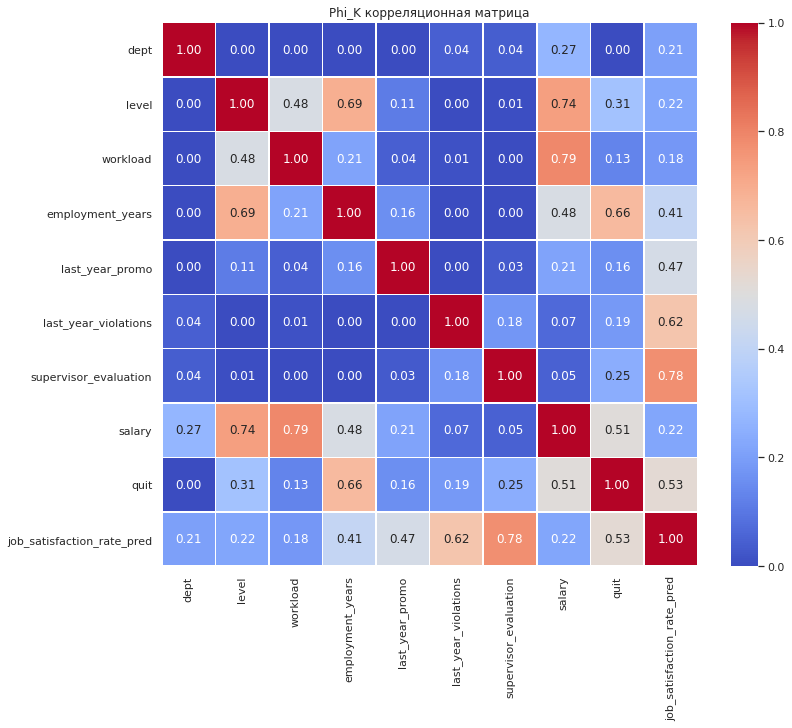

Удалены признаки: set()
Размер train_job_copy после удаления мультиколлинеарности: (4000, 11)


In [97]:
# Рассчитываем матрицу phik
train_quit_copy_no_id = train_quit_copy.drop('id', axis=1)
phik_matrix = train_quit_copy_no_id.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate_pred'])

# Визуализируем матрицу phi_k
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Phi_K корреляционная матрица")
plt.show()


# Анализ мультиколлинеарности (на основе Phi_K)
threshold = 0.8

cols_to_drop = set()

for i in range(len(phik_matrix.columns)):
    for j in range(i):
        if abs(phik_matrix.iloc[i, j]) > threshold:
            colname_i = phik_matrix.columns[i]
            colname_j = phik_matrix.columns[j]
            cols_to_drop.add(colname_i)

train_quit_copy = train_quit_copy.drop(columns=cols_to_drop)

print(f"Удалены признаки: {cols_to_drop}")
print("Размер train_job_copy после удаления мультиколлинеарности:", train_quit_copy.shape)


- Очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет.
- Наблюдается сильная корреляция между salary и workload, job_satisfaction_rate и supervisor_evaluation, salary и level

In [98]:
test_features_copy = test_features.copy()

X_test_features = test_features_copy.drop(columns=['id'])

y_pipe_test = randomized_search.predict(X_test_features)   # predictions 

print(y_pipe_test)

[0.885      0.68222222 0.69777778 ... 0.195      0.51857143 0.57444444]


Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


In [99]:
test_features_copy['job_satisfaction_rate_pred'] = y_pipe_test
test_features_copy.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.885000
1,686555,hr,junior,medium,1,no,no,4,30000,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,0.697778
3,418655,sales,middle,low,6,no,no,4,19200,0.697778
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556


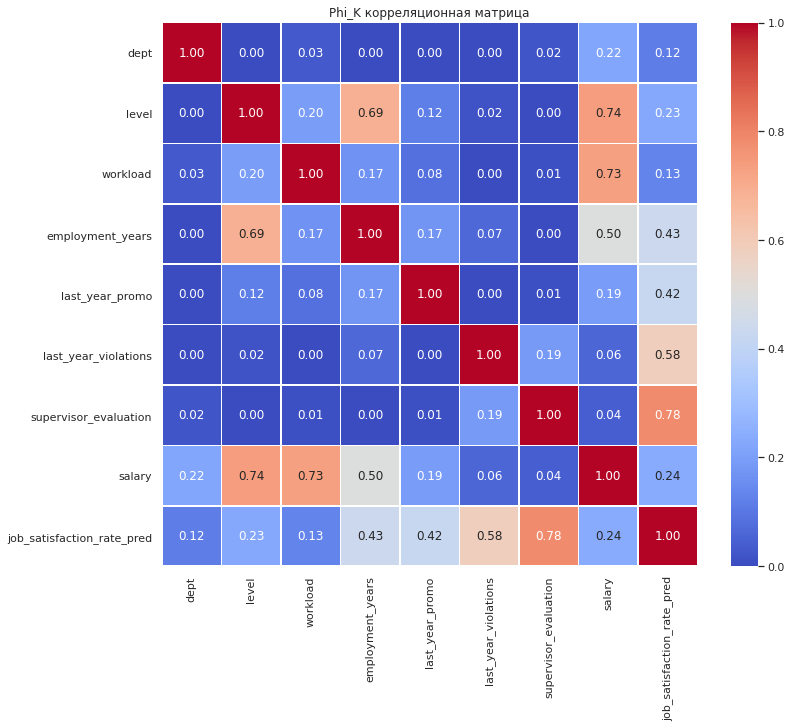

Удалены признаки: set()
Размер test_features_copy после удаления мультиколлинеарности: (2000, 10)


In [100]:
# Рассчитываем матрицу phik
test_features_copy_no_id = test_features_copy.drop('id', axis=1)
phik_matrix = test_features_copy_no_id.phik_matrix(interval_cols=['salary', 'job_satisfaction_rate_pred'])

# Визуализируем матрицу phi_k
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Phi_K корреляционная матрица")
plt.show()


# Анализ мультиколлинеарности (на основе Phi_K)
threshold = 0.8

cols_to_drop = set()

for i in range(len(phik_matrix.columns)):
    for j in range(i):
        if abs(phik_matrix.iloc[i, j]) > threshold:
            colname_i = phik_matrix.columns[i]
            colname_j = phik_matrix.columns[j]
            cols_to_drop.add(colname_i)

test_features_copy = test_features_copy.drop(columns=cols_to_drop)

print(f"Удалены признаки: {cols_to_drop}")
print("Размер test_features_copy после удаления мультиколлинеарности:", test_features_copy.shape)


- Очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет.

### Обучение модели.
<a id='11.3-bullet'></a>

In [101]:
train_quit_copy_no_id = train_quit_copy.drop(columns=['id'])

In [102]:
train_quit_copy_no_id.duplicated().sum()

1413

In [103]:
train_quit_copy_no_id = train_quit_copy_no_id.drop_duplicates()
train_quit_copy_no_id.duplicated().sum()

0

In [104]:
X_train = train_quit_copy_no_id.drop(columns=['quit'])
y_train = train_quit_copy_no_id['quit']

In [105]:
test_features_copy = test_features_copy.merge(test_target_quit[['id', 'quit']], on='id', how='left')

In [106]:
test_features_copy_no_id = test_features_copy.drop('id', axis=1)
test_features_copy_no_id

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred,quit
0,marketing,junior,medium,2,no,no,5,28800,0.885000,no
1,hr,junior,medium,1,no,no,4,30000,0.682222,no
2,sales,middle,low,5,no,no,4,19200,0.697778,no
3,sales,middle,low,6,no,no,4,19200,0.697778,no
4,hr,middle,medium,5,no,no,5,40800,0.825556,no
...,...,...,...,...,...,...,...,...,...,...
1995,marketing,junior,low,3,no,no,3,20400,0.508571,yes
1996,technology,middle,low,3,no,no,2,21600,0.151429,yes
1997,technology,junior,low,1,no,no,3,14400,0.195000,yes
1998,technology,middle,low,8,no,no,1,32400,0.518571,no


In [107]:
test_features_copy_no_id.duplicated().sum()

504

In [108]:
test_features_copy_no_id = test_features_copy_no_id.drop_duplicates()
test_features_copy_no_id.duplicated().sum()

0

In [109]:
X_test = test_features_copy_no_id.drop(columns=['quit'])
y_test = test_features_copy_no_id['quit']

In [110]:
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [111]:
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years',
               'salary',
               'supervisor_evaluation'
              ]

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

print(le.classes_)  # ['no' 'yes']

# def clean_df(X):
#     X = X.copy()
#     for c in ['dept','level','workload','last_year_promo','last_year_violations']:
#         if c in X:
#             X[c] = X[c].astype(str).str.strip().replace({' ': np.nan, 'nan': np.nan, '': np.nan})
#     X['level'] = X.get('level').replace({'sinior': 'senior'}) if 'level' in X else X.get('level')
#     return X


replace_space = FunctionTransformer(lambda X: X.replace(' ', 'unknown'))

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('replace_space', replace_space),
     ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('replace_space', replace_space),
     ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=-1
            )
        ),
     ]
)                              


# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


pipe = Pipeline([ 
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

param_distributions = [
    {
        # LogisticRegression
        'models': [LogisticRegression(random_state=RANDOM_STATE, 
                   solver='liblinear',
                   max_iter=5000)],
        'models__penalty': ['l2', 'l1'],
        'models__C': np.logspace(-4, 2, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        # RandomForestClassifier
        'models': [RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)],
        'models__n_estimators': [200, 500, 1000],
        'models__max_depth': [None, 5, 10, 20, 30],
        'models__max_features': ['sqrt', 'log2', 0.2, 0.5],
        'models__class_weight': [None, 'balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    
    {
        # LGBMClassifier 
        'models': [LGBMClassifier (random_state=RANDOM_STATE, n_jobs=-1, verbose=-1)],
        'models__n_estimators': [100, 300, 500],           
        'models__learning_rate': [0.01, 0.03, 0.05],       
        'models__num_leaves': [31, 63],                   
        'models__min_child_samples': [5, 20],              
        'models__colsample_bytree': [0.6, 0.8],
        'models__subsample': [0.6, 0.8],                
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]


randomized_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=0,
    random_state=RANDOM_STATE,
    n_jobs=-1,            
    refit=True
)

randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

['no' 'yes']
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('replace_space',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f28b6917d30>)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                  

### Оценка качества модели.
<a id='11.4-bullet'></a>

In [112]:
y_pipe #predictions на первой модели на тестовой выборке

array([0.885     , 0.68222222, 0.69777778, ..., 0.195     , 0.51857143,
       0.57444444])

In [113]:
test_features_copy = test_features.copy()
test_features_copy['job_satisfaction_rate_pred'] = y_pipe

test_merged = test_features_copy.merge(test_target_quit[['id','quit']],
                              on='id', how='left')

# проверяем пропуски и соответствие размеров
print("пропуски targets:", test_merged['quit'].isna().sum())
print("размер:", len(test_merged))

X_test = test_merged.drop(columns=['id', 'quit'])
y_test = test_merged['quit']

le = LabelEncoder()

y_test = le.fit_transform(y_test)

y_pred_proba = randomized_search.predict_proba(X_test)[:, 1]

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred_proba)}')


пропуски targets: 0
размер: 2000
Метрика ROC-AUC на тестовой выборке: 0.9229248157806356


Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


In [114]:
X_train = train_quit_copy_no_id.drop(columns=['quit'])
y_train = train_quit_copy_no_id['quit']

In [115]:
X_test = test_merged.drop(columns=['id', 'quit'])
y_test = test_merged['quit']

In [116]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

In [117]:
# Создаем и обучаем DummyRegressor на тех же данных, что и модель
dummy_model = DummyClassifier(strategy='prior')
dummy_model.fit(X_train, y_train)

DummyClassifier()

In [118]:
# Предсказания модели     
y_pred_model = randomized_search.predict(X_test)
# Предсказания DummyRegressor
y_pred_dummy = dummy_model.predict(X_test)

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


In [119]:
accuracy = accuracy_score(y_test, y_pred_model)
precision = precision_score(y_test, y_pred_model, average='weighted')
recall = recall_score(y_test, y_pred_model, average='weighted')
f1 = f1_score(y_test, y_pred_model, average='weighted')
cm = confusion_matrix(y_test, y_pred_model)
print(f"Метрики лучшей модели: Accuracy={accuracy:.3f}")
print(f"Precision={precision:.3f}")
print(f"Recall={recall:.3f}")
print(f"F1-score={f1:.3f}")
print("Confusion matrix:\n", cm)

Метрики лучшей модели: Accuracy=0.890
Precision=0.889
Recall=0.890
F1-score=0.889
Confusion matrix:
 [[1349   87]
 [ 132  432]]


In [120]:
accuracy = accuracy_score(y_test, y_pred_dummy)
precision = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_dummy, average='weighted')
f1 = f1_score(y_test, y_pred_dummy, average='weighted')
cm = confusion_matrix(y_test, y_pred_dummy)
print(f"Метрики DummyClassifier: Accuracy={accuracy:.3f}")
print(f"Precision={precision:.3f}")
print(f"Recall={recall:.3f}")
print(f"F1-score={f1:.3f}")
print("Confusion matrix:\n", cm)

Метрики DummyClassifier: Accuracy=0.718
Precision=0.516
Recall=0.718
F1-score=0.600
Confusion matrix:
 [[1436    0]
 [ 564    0]]


Итог: лучшая модель существенно превосходит базовую (DummyClassifier).  

### Выводы по обучению модели
<a id='11.5-bullet'></a>

LGBM выиграл потому, что это градиентный бустинг над деревьями — он автоматически захватывает нелинейности и взаимодействия признаков, устойчив к несбалансированности/масштабам и лучше работает на табличных данных с сочетанием категориальных и числовых признаков. LogisticRegression — линейная модель, она ограничена по форме решения и чувствительна к предобработке и регуляризации; поэтому часто уступает бустингу на реальных данных. Деревья устойчивы к выбросам и высоким размерностям, тогда как линейная модель может пропустить полезный сигнал.

## Общий вывод
<a id='12-bullet'></a>

**Целью исследования** была оптимизация управления персоналом бизнеса: на основании предоставленных данных предложить бизнесу, как избежать финансовых потерь и оттока сотрудников.

**Задачами исследования были:**
1. Построение модели, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2. построение модели, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**В ходе исследованиия были выполнены следующие этапы:**

1. Были загружены и изучены предоставленные компанией данные,

2. Проведена предобработка данных, в ходе которой данные были проверены на дубликаты, был проведен анализ уникальных значений, обнаружены значения nan и незаполненные значения.

3. Проведен исследовательский анализ данных, в ходе которого были построены гистограммы распределений для количественных столбцов, столбчатые графики для категориальных столбцов датафреймов, рассчитана матрица корреляции признаков. В ходе анализа был выявлен дисбаланс признаков, мультиколлинеарность не выявлена.

4.Произведено обучение моделей и выбор лучших для поставленных задач.В результате решения первой задачи была построена лучшая модель RandomForestRegressor, показавшая лучшие результаты SMAPE на кросс-валидации.В результате решения второй задачи была построена лучшая модель LGBM, которая автоматически захватывает нелинейности и взаимодействия признаков, устойчива к несбалансированности/масштабам и лучше работает на табличных данных с сочетанием категориальных и числовых признаков.

5. Произведена оценка качества моделей метриками SMAP и ROC-AUC.

6. Составлен портрет уволившегося сотрудника:
- По отделам (dept):
   - Самый большой процент уволенных — в отделе sales (36.08%), за ним идут technology (24.47%) и purchasing (14.72%).
   - Наименьшая доля уволенных — в отделе hr (10.28%).
   - Отделы с большим числом сотрудников или более высокой текучестью могут требовать дополнительного анализа.
- По уровню (level):
  - Почти все уволенные — это junior сотрудники (88.92%), что указывает на высокий уровень текучести среди младших специалистов.
  - В более старших категориях — значительный дисбаланс, всего около 9.57% — middle, и лишь 1.51% — senior.
- По рабочей нагрузке (workload):
  - Уволены примерно равномерно между low (46.01%) и medium (43.26%) нагрузками. Меньше high (10.73%).
 - По стажу работы (employment_years):
  - Прослеживается, что более длинный стаж (более 1 года) связан с меньшей долей увольнений.
  - Самая высокая доля — у сотрудников с 1 годом работы (53.10%), затем у тех кто с 2 годами (25.71%).
- По повышению за последний год (last_year_promo):
  - Почти все — не получали повышение в прошлом году (99.91%), меньшая часть — получили (0.09%).
- По наличию нарушений (last_year_violations):
  - Большинство сотрудников — без нарушений (79.79%), с 20.21% нарушителей. Нарушения, возможно, являются фактором увольнения.
- По оценке руководителя (supervisor_evaluation):
  - Большинство уволенных — с низкими оценками (3 и 4). Меньше — с оценкой 1 и 2. Высокая оценка (5) связана с меньшей долей уволенных (5.32%).

**Рекомендации для бизнеса:**

1. Фокусироваться на отделах и уровнях, где доля уволенных выше, для предиктивных мер.
2. Анализировать причины высокой текучести среди младших сотрудников и сотрудников с коротким стажем.
3. Изучить влияние нарушений и оценок руководителей на увольнения.
4. Рассмотреть меры по снижению увольнений, связанные с управлением нагрузкой и развитием сотрудников:
  1. Снизить отток в группе junior (даст максимальный эффект):
     - назначить наставника (peer mentor) на первые 3–6 мес.
  2. Повысить вовлечённость/нагрузку у low‑workload сотрудников:
     - проводить короткие опросы (1–3 вопроса — удовлетворённость, нагрузка, намерение уйти) ежемесячно среди junior/low workload.
  3. Исправить дисбаланс компенсаций и улучшить видимость карьерного роста:
     - регулярные карьерные сессии, планы обучения, менторские программы.
  4. Исправить «аномалии» зарплат: 
     - провести быструю проверку зарплат внутри уровня junior;
     - выровнять явно заниженные позиции (скорректировать базовую оплату для топ‑кандидатов ухода).